In [3]:
# data handling libraries
import numpy as np
import pandas as pd

# Time for proccesses
import time

# Data obtension
import requests
import json

# Data visualization
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

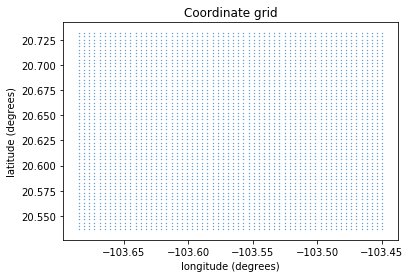

In [4]:
# Determine geospacial delimitations for the Primavera Forest 

x1, y1 = 20.730654, -103.684725
x2, y2 = 20.536931, -103.684725
x3, y3 = 20.536931, -103.449552
x4, y4 = 20.731724, -103.449552

x = [x1,x2,x3,x4]
y = [y1,y2,y3,y4]

# Generate a grid for the data points:
x_grid = np.linspace(min(x), max(x),60)
y_grid = np.linspace(min(y), max(y),60)
grid = [[x,y] for x in x_grid for y in y_grid]

# Convert into dataframe to handle data better:
grid_df = pd.DataFrame(grid, columns=['lat','lon'])

# plot the grid
plt.scatter(grid_df.lon,grid_df.lat, s=.1)
plt.title('Coordinate grid')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')
plt.show()

In [5]:
# Generate a perimeter (polygon) for the visualization on a map

# Data on a json-style architecture
primavera = {'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [
    [[-103.684725,20.730654],
    [-103.684725, 20.536931],
    [-103.449552, 20.536931],
    [-103.449552, 20.730654],
    [-103.684725, 20.730654]]]},
 'id': '1'}

fig = go.Figure(go.Choroplethmapbox(geojson=primavera, locations=list('1'), z=[10],
                                    colorscale="Earth", zmin=0, zmax=12,
                                    marker_opacity=.5, marker_line_width=5, showscale=False))

fig.update_layout(mapbox_style='stamen-terrain') #NICE
                                    
# Other styles
#fig.update_layout(mapbox_style='open-street-map')  # NICE
#fig.update_layout(mapbox_style='carto-positron')
#fig.update_layout(mapbox_style='stamen-toner') 
#fig.update_layout(mapbox_style='stamen-watercolor')

fig.update_layout(mapbox_zoom=10.7, mapbox_center = {"lat": (max(x)+min(x))/2, "lon":(max(y)+min(y))/2} )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [6]:
# Plot the grid on the map

fig = px.scatter_mapbox(grid_df, lat='lat' , lon='lon', zoom=10.8)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [7]:
# Use a dataset for the heatpoints obtained by a satelite on:
# http://www.marn.gob.sv/mapas-de-puntos-de-calor/

# Dataframe for the information
heat_points = pd.read_csv('./puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65/puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65/puntos_calor_estado_1_1-14_2000-01-01_2019-08-18_1566202819_65.csv')

# function to replace the latlon column and generate both a latitude and longitude column.
def lat_replace(x):
    alpha = x.replace('POINT','').replace('(', '').replace(')','').split(' ')
    return float(alpha[0])

def lon_replace(x):
    alpha = x.replace('POINT','').replace('(', '').replace(')','').split(' ')
    return float(alpha[1])

heat_points['lat'] = heat_points.latlon.apply(lat_replace)
heat_points['lon'] = heat_points.latlon.apply(lon_replace)

# Drop non-useful columns
heat_points.drop(['latlon', 'id_pais', 'id_estado','nom_pais', 'nom_estado'], axis=1, inplace=True)

# Filter by the desired coordinates (inside the bosque de la primavera perimeter)
interest_heat_points = heat_points[(heat_points.lon >= min(x))&(heat_points.lon <= max(x))&(heat_points.lat >= min(y))&(heat_points.lat <= max(y))]

fig = px.scatter_mapbox(interest_heat_points, lat="lon", lon="lat", color='pendiente', zoom=10.8)

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [22]:
# API Consumption, do not run unless you know what you are doing

keys = ['8b88d255188e5b91c360c8820f851209','f6a3f1451c57f3c47462789d7fd7db67','0184dd7d5e28a74578c3d896ec8ba417', '16128d728acfa488b037d5752b4dad5c']
url = 'https://api.darksky.net/forecast/'
info4 = []
count=0
key=0
val=0

for coordinate in grid[val:]:
    loc_time = (f'{coordinate[0]},{coordinate[1]},1566259200')
    information = requests.get(f'{url}{keys[key]}/{loc_time}').json()
    info4.append(information)
    count += 1
    if count == 900:
        count = 0
        key += 1
    time.sleep(.02)

# Change name of file to avoid overwriting
with open('08_20_2019', 'w') as fout:
    json.dump(info4, fout)

#val = grid.index(coordinate)
# If already generated use this code
#with open('info_file') as fout:
#    info = json.load(fout)

In [31]:
current_info = [info4[i]['currently'] for i in range(len(info4))]
information = pd.DataFrame(current_info)
information['longitude'] = grid_df.lon
information['latitude'] = grid_df.lat
information


time        summary               icon  precipIntensity  \
0     1566259200  Mostly Cloudy  partly-cloudy-day           0.0164   
1     1566259200  Mostly Cloudy  partly-cloudy-day           0.0163   
2     1566259200  Mostly Cloudy  partly-cloudy-day           0.0161   
3     1566259200  Mostly Cloudy  partly-cloudy-day           0.0160   
4     1566259200  Mostly Cloudy  partly-cloudy-day           0.0159   
...          ...            ...                ...              ...   
3595  1566259200  Mostly Cloudy  partly-cloudy-day           0.0025   
3596  1566259200  Mostly Cloudy  partly-cloudy-day           0.0025   
3597  1566259200  Mostly Cloudy  partly-cloudy-day           0.0024   
3598  1566259200  Mostly Cloudy  partly-cloudy-day           0.0024   
3599  1566259200  Mostly Cloudy  partly-cloudy-day           0.0024   

      precipProbability precipType  temperature  apparentTemperature  \
0                  0.08       rain        82.51                83.29   
1                  0.08       rain        83.08                83.73   
2                  0.08       rain        83.54                84.09   
3                  0.08       rain        83.77                84.25   
4                  0.08       rain        83.82                84.28   
...                 ...        ...          ...                  ...   
3595               0.05       rain        82.46                83.09   
3596               0.05       rain        82.48                83.11   
3597               0.05       rain        82.49                83.12   
3598               0.05       rain        82.48                83.12   
3599               0.05       rain        82.47                83.11   

      dewPoint  humidity  pressure  windSpeed  windGust  windBearing  \
0        61.86      0.50   1003.82       3.14      5.46           84   
1        61.69      0.49   1003.84       3.12      5.45           84   
2        61.52      0.48   1003.85       3.11      5.44           85   
3        61.41      0.47   1003.86       3.10      5.43           85   
4        61.37      0.47   1003.87       3.09      5.42           85   
...        ...       ...       ...        ...       ...          ...   
3595     61.31      0.49   1003.89       2.64      7.62           94   
3596     61.31      0.49   1003.89       2.65      7.59           94   
3597     61.31      0.49   1003.88       2.65      7.55           94   
3598     61.33      0.49   1003.88       2.65      7.52           94   
3599     61.34      0.49   1003.87       2.65      7.49           94   

      cloudCover  uvIndex  visibility  ozone   longitude   latitude  
0           0.75        1       5.990  281.8 -103.684725  20.536931  
1           0.75        1       6.053  281.8 -103.680739  20.536931  
2           0.75        1       6.116  281.7 -103.676753  20.536931  
3           0.75        1       6.180  281.7 -103.672767  20.536931  
4           0.75        1       6.243  281.7 -103.668781  20.536931  
...          ...      ...         ...    ...         ...        ...  
3595        0.75        1       9.774  280.8 -103.465496  20.731724  
3596        0.75        1       9.784  280.8 -103.461510  20.731724  
3597        0.75        1       9.793  280.8 -103.457524  20.731724  
3598        0.75        1       9.802  280.8 -103.453538  20.731724  
3599        0.75        1       9.812  280.8 -103.449552  20.731724  

[3600 rows x 20 columns]

In [32]:
information.describe().T
information = information[['time','temperature', 'dewPoint', 'humidity', 'windSpeed', 'windGust', 
                           'windBearing', 'cloudCover', 'longitude', 'latitude']]

In [33]:
met_correlations = information[['temperature','dewPoint','humidity', 'windSpeed', 'windGust']].corr()
met_correlations

temperature  dewPoint  humidity  windSpeed  windGust
temperature     1.000000 -0.851453 -0.990118   0.557538  0.234993
dewPoint       -0.851453  1.000000  0.906970  -0.863701 -0.567738
humidity       -0.990118  0.906970  1.000000  -0.636336 -0.319978
windSpeed       0.557538 -0.863701 -0.636336   1.000000  0.696059
windGust        0.234993 -0.567738 -0.319978   0.696059  1.000000

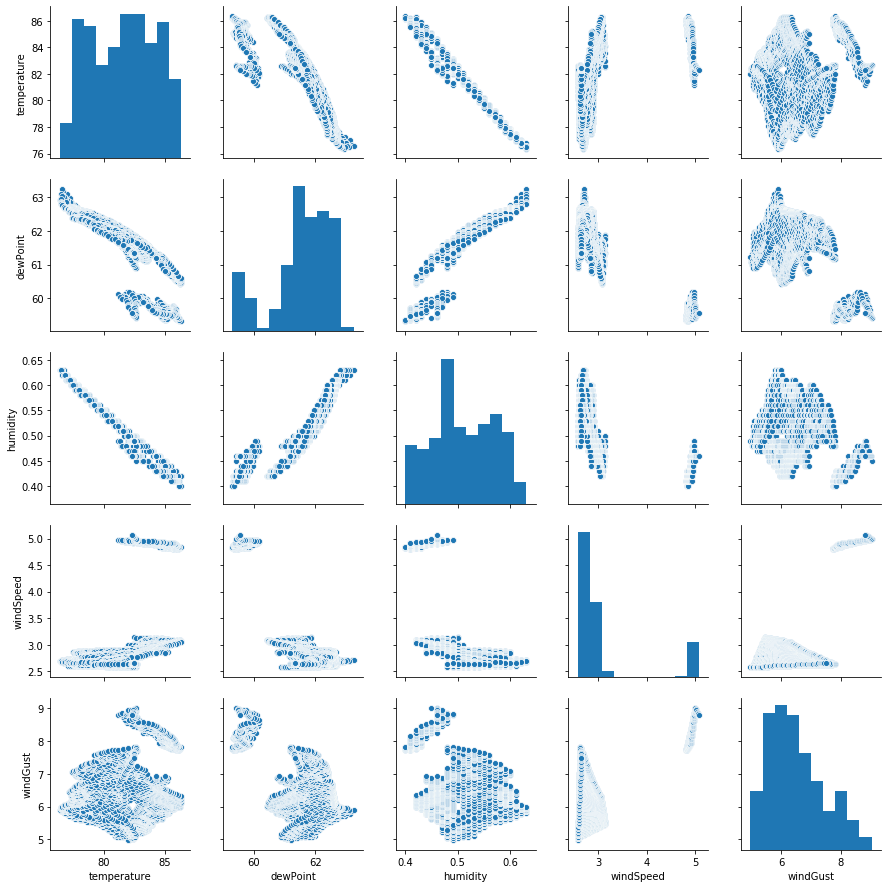

In [34]:
sns.pairplot(information[['temperature','dewPoint','humidity', 'windSpeed', 'windGust']])

In [35]:
temperature = np.split(np.array(information.temperature), len(x_grid))[::-1]
humidity  = np.split(np.array(information.humidity), len(x_grid))[::-1]
dewPoint = np.split(np.array(information.dewPoint), len(x_grid))[::-1]
windSpeed = np.split(np.array(information.windSpeed), len(x_grid))[::-1]
windGust = np.split(np.array(information.windGust), len(x_grid))[::-1]
windBearing = np.split(np.array(information.windBearing), len(x_grid))[::-1]

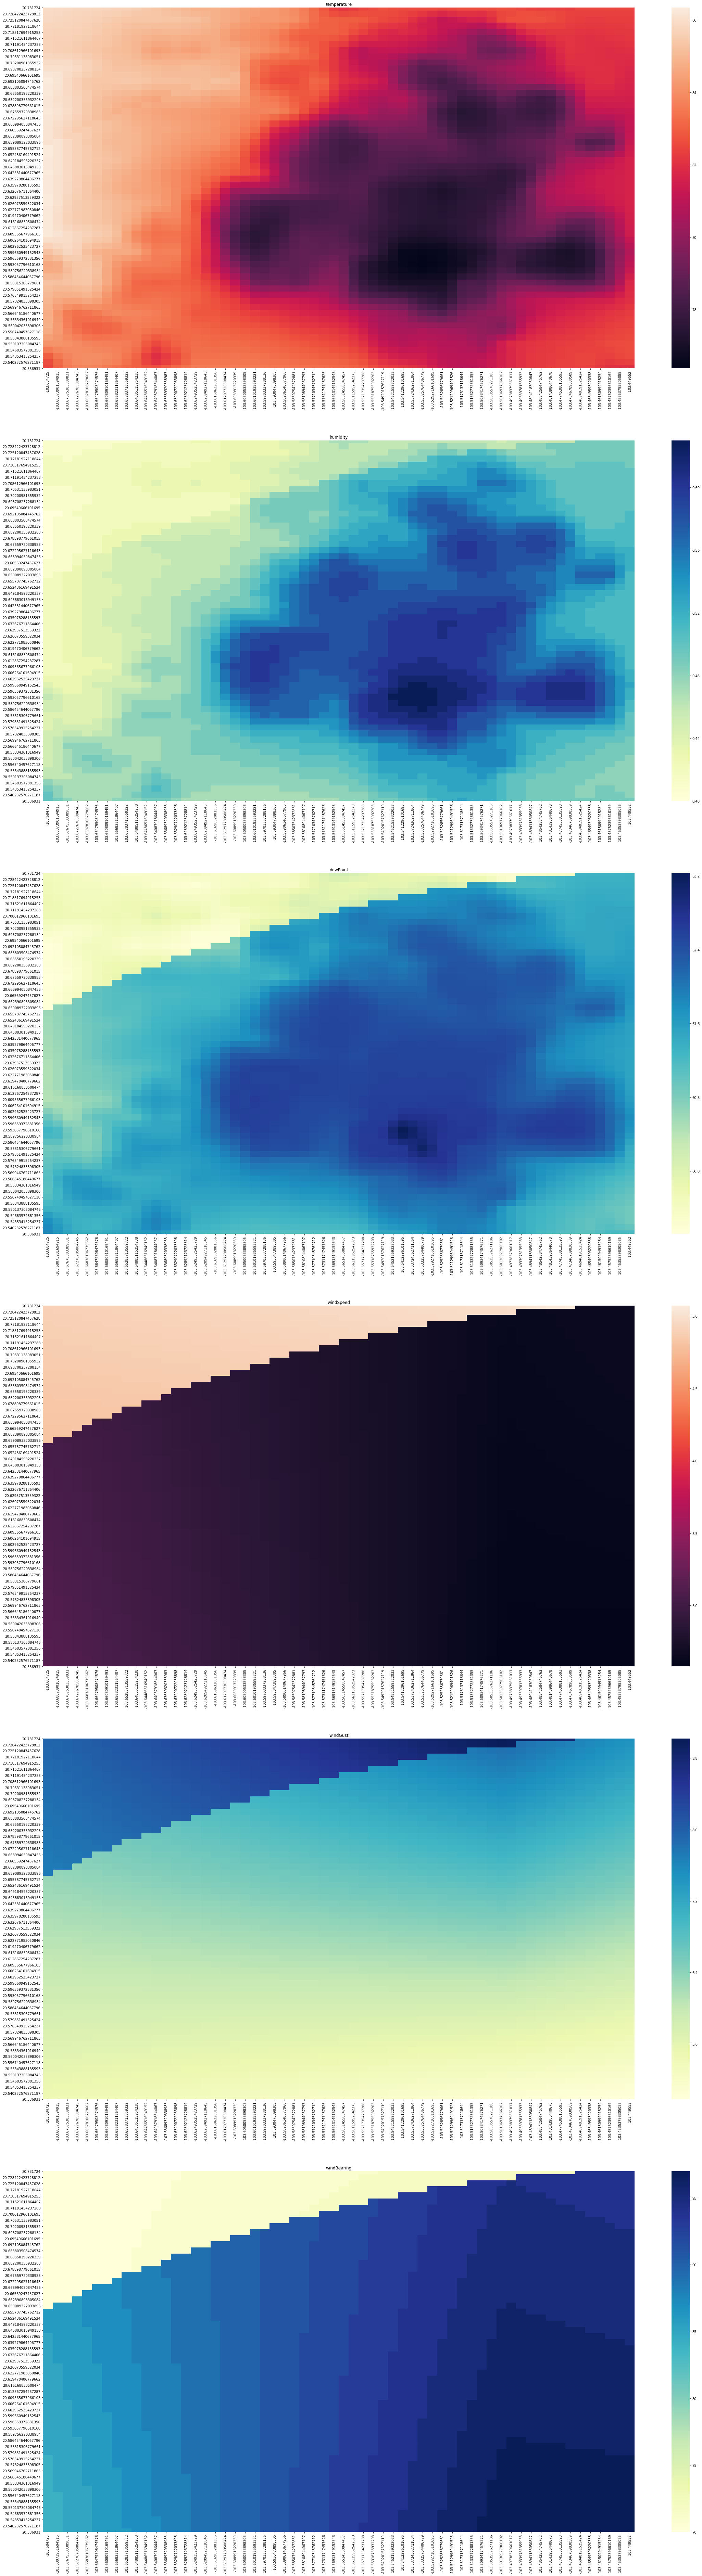

In [36]:
plt.subplot(711)
sns.heatmap(temperature , xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('temperature')


plt.subplot(712)
sns.heatmap(humidity, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('humidity')


plt.subplot(713)
sns.heatmap(dewPoint, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('dewPoint')


plt.subplot(714)
sns.heatmap(windSpeed, xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windSpeed')


plt.subplot(715)
sns.heatmap(windGust, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windGust')


plt.subplot(716)
sns.heatmap(windBearing, cmap='YlGnBu', xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windBearing')


plt.subplots_adjust(left=0,right=5, top=30, bottom=.0)

In [37]:
forest_fire = [pd.read_excel(f'./Serie_historica_anual_incendios_(20{i}).xlsx') for i in range(10,18)]

FileNotFoundError: [Errno 2] No such file or directory: './Serie_historica_anual_incendios_(2010).xlsx'

In [ ]:
hourly_data = [info4[i]['hourly']['data'][0] for i in range (len(info4))]
hourly_data = pd.DataFrame(hourly_data)

temperature = np.split(np.array(hourly_data.temperature), len(x_grid))[::-1]
humidity  = np.split(np.array(hourly_data.humidity), len(x_grid))[::-1]
dewPoint = np.split(np.array(hourly_data.dewPoint), len(x_grid))[::-1]
windSpeed = np.split(np.array(hourly_data.windSpeed), len(x_grid))[::-1]
windGust = np.split(np.array(hourly_data.windGust), len(x_grid))[::-1]
windBearing = np.split(np.array(hourly_data.windBearing), len(x_grid))[::-1]
cloudCover = np.split(np.array(hourly_data.cloudCover), len(x_grid))[::-1]
#ozone = np.split(np.array(hourly_data.ozone), len(x_grid))[::-1]
precipIntensity = np.split(np.array(hourly_data.precipIntensity), len(x_grid))[::-1]
#pressure = np.split(np.array(hourly_data.pressure), len(x_grid))[::-1]


plt.subplot(9,1,1)
sns.heatmap(temperature,xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('temperature')

plt.subplot(9,1,2)
sns.heatmap(humidity, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('humidity')

plt.subplot(9,1,3)
sns.heatmap(dewPoint, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('dewPoint')

plt.subplot(9,1,4)
sns.heatmap(windSpeed, xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windSpeed')

plt.subplot(9,1,5)
sns.heatmap(windGust, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windGust')

plt.subplot(9,1,6)
sns.heatmap(windBearing, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('windBearing')

plt.subplot(9,1,7)
sns.heatmap(cloudCover, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('cloudCover')

plt.subplot(9,1,8)
sns.heatmap(precipIntensity, cmap='YlGnBu',xticklabels=y_grid, yticklabels=x_grid[::-1])
plt.title('precipIntensity')

#plt.subplot(9,1,9)
#sns.heatmap(pressure, cmap='YlGnBu')
#plt.title('pressure')


plt.subplots_adjust(left=0,right=5, top=30, bottom=.0)

In [ ]:
forest_fire[-1].columns

In [ ]:
for element in forest_fire:
    print(set(element.columns))
    print('')